# Analysis

In [1]:
import pandas as pd

df = pd.read_csv("../results/local_5.csv")
df

,dataset,backend,estimators,max_depth,accuracy,train_time,predict_time,threads,nodes
0,iris,omp,512,0,1.000000,0.042949,0.001257,2,1
1,iris,seq,128,0,1.000000,0.039404,0.000425,1,1
2,iris,seq,64,0,1.000000,0.021636,0.000364,1,1
3,iris,omp,64,0,1.000000,0.003782,0.000620,16,1
4,iris,omp,128,0,1.000000,0.004607,0.000671,16,1
5,iris,ff,128,0,1.000000,0.006944,0.002485,16,1
6,iris,seq,256,0,1.000000,0.058290,0.000799,1,1
7,iris,omp,128,0,1.000000,0.012404,0.000515,4,1
8,iris,ff,64,0,1.000000,0.008261,0.003046,16,1
9,iris,omp,512,0,1.000000,0.035834,0.001356,4,1


In [2]:
df = df[df["estimators"] == 64].sort_values(by=["threads", "backend"])
df = df[["train_time", "threads", "backend"]]
df

,train_time,threads,backend
2,0.021636,1,seq
24,0.013361,2,ff
18,0.012137,2,omp
26,0.008081,4,ff
29,0.007555,4,omp
32,0.006351,8,ff
17,0.004505,8,omp
8,0.008261,16,ff
3,0.003782,16,omp


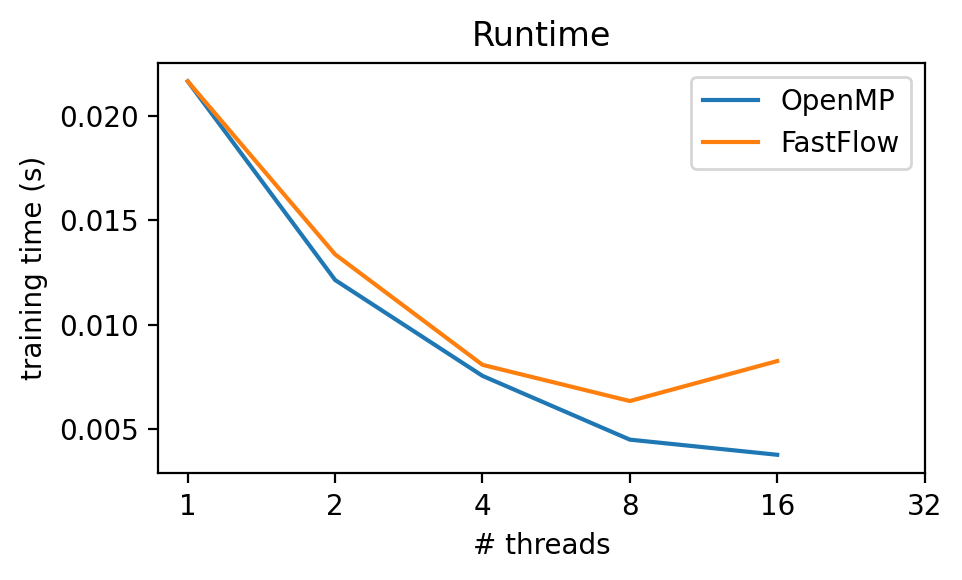

In [4]:
import matplotlib.pyplot as plt


omp = df[(df["backend"] == "omp") | (df["backend"] == "seq")]
ff = df[(df["backend"] == "ff") | (df["backend"] == "seq")]

plt.figure(figsize=(5, 3), dpi=200)
plt.title("Runtime")
plt.plot(omp["threads"], omp["train_time"], label="OpenMP")
plt.plot(ff["threads"], ff["train_time"], label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16, 32]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("training time (s)")
plt.legend()
plt.tight_layout()
plt.show()

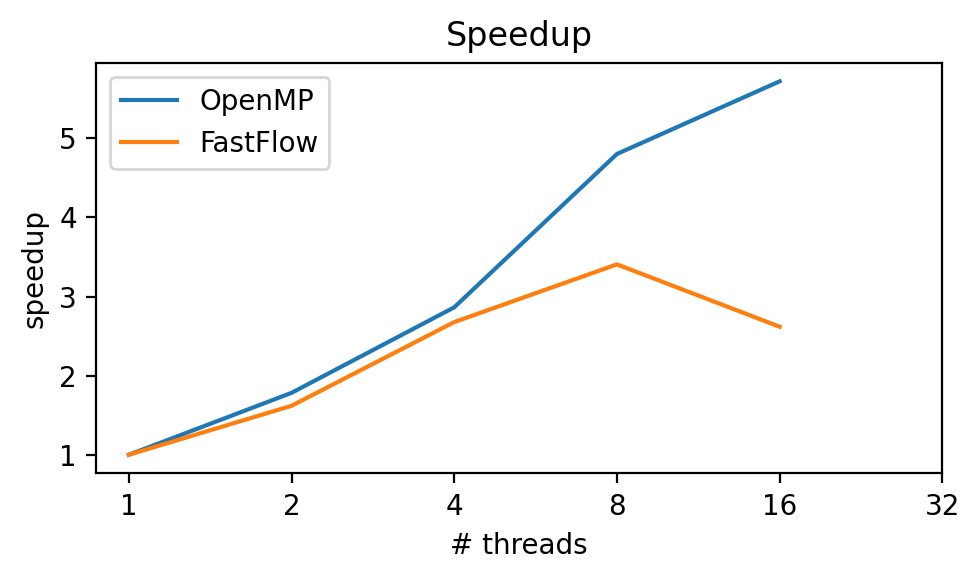

In [5]:
omp_s = df[df["backend"] == "seq"]["train_time"].to_numpy() / omp["train_time"].to_numpy()
ff_s = df[df["backend"] == "seq"]["train_time"].to_numpy() / ff["train_time"].to_numpy()


plt.figure(figsize=(5, 3), dpi=200)
plt.title("Speedup")
plt.plot(omp["threads"], omp_s, label="OpenMP")
plt.plot(ff["threads"], ff_s, label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16, 32]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("speedup")
plt.legend()
plt.tight_layout()
plt.show()

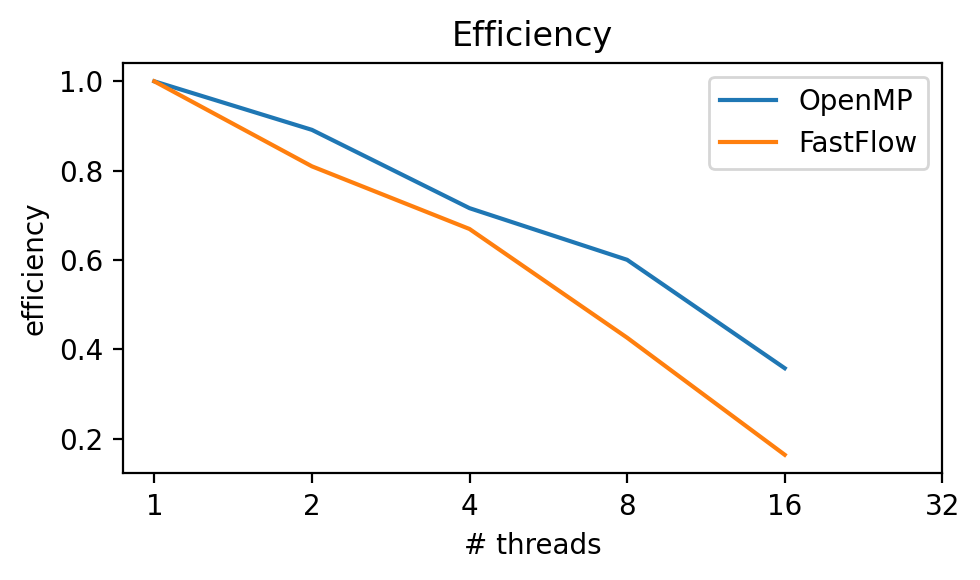

In [6]:
omp_e = omp_s / omp["threads"].to_numpy()
ff_e = ff_s / ff["threads"].to_numpy()


plt.figure(figsize=(5, 3), dpi=200)
plt.title("Efficiency")
plt.plot(omp["threads"], omp_e, label="OpenMP")
plt.plot(ff["threads"], ff_e, label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16, 32]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("efficiency")
plt.legend()
plt.tight_layout()
plt.show()
